## Exercise 1: Diving into Classification

In this notebook, we want to dive into a practical application for machine learning. For this we rely on the `scikit-learn` (`sklearn` for short) library as well as pandas for data handling. The onset is very simple. You are invested for a party and promise to help with the preparations. As you are decorating the buffet with snacks, you mix a bowl of peanuts, walnuts and other chocolate covered candy. Once you are done, the hosts inform you that they expecting guests which are allergic to peanuts. You are now tasked to filter out the peanuts from the bowl of snacks. The dataset, `peanuts.csv` below presents the measurements taken on the bowl of dried snacks. Let's use classification to automate the task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
# the data was obtained from https://zenodo.org/records/10014609
df = pd.read_csv("peanuts.csv")

In [3]:
# let's inspect the data
print(df.shape, "\n", df.dtypes)

(100, 5) 
 color      int64
shape      int64
height     int64
width      int64
label     object
dtype: object


In the above, we see that most data is detected as `int64`, so this referes to integer numbers. The label however is recognized as object. To convert it into something meaningful, we need to help pandas a bit.

In [4]:
df.label = df.label.astype("category")
df.dtypes

color        int64
shape        int64
height       int64
width        int64
label     category
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   color   100 non-null    int64   
 1   shape   100 non-null    int64   
 2   height  100 non-null    int64   
 3   width   100 non-null    int64   
 4   label   100 non-null    category
dtypes: category(1), int64(4)
memory usage: 3.5 KB


## Prepare data for training

In [6]:
X, y = df[["color","shape", "height","width"]].to_numpy(), df["label"]
print("input data X is available as:", X.shape, X.dtype)
print("label data y is available as:", y.shape, y.dtype)

input data X is available as: (100, 4) int64
label data y is available as: (100,) category


In [9]:
print(X)
print(y)

[[ 3  0 12 17]
 [ 0  1 16 16]
 [ 0  1 13 16]
 [ 1  0 16 21]
 [ 0  1 15 17]
 [ 0  1 14 16]
 [ 0  1 15 17]
 [ 3  2  7 15]
 [ 3  2  7 15]
 [ 0  1 16 17]
 [ 0  1 16 18]
 [ 3  0 16 18]
 [ 2  2  7 15]
 [ 2  2  7 15]
 [ 3  0 19 22]
 [ 0  1 16 16]
 [ 2  1 16 18]
 [ 3  2  7 15]
 [ 0  1 16 18]
 [ 3  0 10 17]
 [ 3  0 13 19]
 [ 1  0 11 19]
 [ 3  0  7 16]
 [ 3  2  7 16]
 [ 3  2  6 15]
 [ 0  1 15 15]
 [ 2  1 17 19]
 [ 0  1 15 16]
 [ 2  1 14 14]
 [ 0  1 13 14]
 [ 0  1 13 14]
 [ 0  1 13 14]
 [ 1  0 13 18]
 [ 3  0 13 14]
 [ 3  0 10 19]
 [ 3  2  6 14]
 [ 0  1 17 13]
 [ 3  2  5 17]
 [ 0  1 17 17]
 [ 0  1 13 16]
 [ 0  1 15 17]
 [ 2  1 21 21]
 [ 2  1 20 20]
 [ 2  1 19 20]
 [ 2  1 18 22]
 [ 3  2  9 15]
 [ 3  2  8 15]
 [ 3  0 15 20]
 [ 1  0 14 20]
 [ 3  0 15 19]
 [ 1  0 15 20]
 [ 1  0 14 18]
 [ 3  0 15 18]
 [ 3  2  8 16]
 [ 3  0 12 18]
 [ 0  1 16 17]
 [ 2  1 18 20]
 [ 3  0 18 18]
 [ 2  1 15 15]
 [ 3  2  5 15]
 [ 0  1 16 16]
 [ 1  0 15 20]
 [ 3  0 15 17]
 [ 3  2  6 15]
 [ 3  0 14 17]
 [ 2  0 15 20]
 [ 3  0 15

In [10]:
# train_test_split is a super helpful function in sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# inspect the data
X_test, y_test

(array([[ 2,  2,  7, 15],
        [ 0,  1, 16, 17],
        [ 3,  0,  7, 16],
        [ 1,  0, 11, 19],
        [ 3,  0, 15, 19],
        [ 3,  2,  8, 15],
        [ 3,  0, 10, 17],
        [ 2,  1, 20, 21],
        [ 0,  1, 14, 14],
        [ 2,  1, 16, 16],
        [ 3,  0, 14, 17],
        [ 3,  0, 12, 18],
        [ 3,  0, 15, 20],
        [ 0,  1, 13, 14],
        [ 0,  1, 15, 16],
        [ 2,  1, 15, 15],
        [ 3,  2,  8, 16],
        [ 3,  0, 13, 20],
        [ 3,  0, 16, 18],
        [ 0,  1, 13, 16]]),
 12    nopeanut
 9     nopeanut
 22      peanut
 21      peanut
 72      peanut
 93    nopeanut
 19      peanut
 97    nopeanut
 92    nopeanut
 70    nopeanut
 90      peanut
 54      peanut
 47      peanut
 29    nopeanut
 89    nopeanut
 58    nopeanut
 53    nopeanut
 88      peanut
 11      peanut
 39    nopeanut
 Name: label, dtype: category
 Categories (2, object): ['nopeanut', 'peanut'])

In [14]:
len(X_train), len(X_test)

(80, 20)

## Create the Tree and fit it

In [12]:
#see the docs for details https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier() 
classifier_tree = classifier_tree.fit(X_train, y_train)

## plot the fitted tree

[Text(0.5833333333333334, 0.9285714285714286, 'x[1] <= 0.5\ngini = 0.475\nsamples = 80\nvalue = [49, 31]'),
 Text(0.4166666666666667, 0.7857142857142857, 'x[0] <= 2.5\ngini = 0.17\nsamples = 32\nvalue = [3, 29]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.3333333333333333, 0.6428571428571429, 'x[0] <= 1.5\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.25, 0.5, 'x[3] <= 19.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 14.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.25, 0.21428571428571427, 'x[2] <= 15.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [

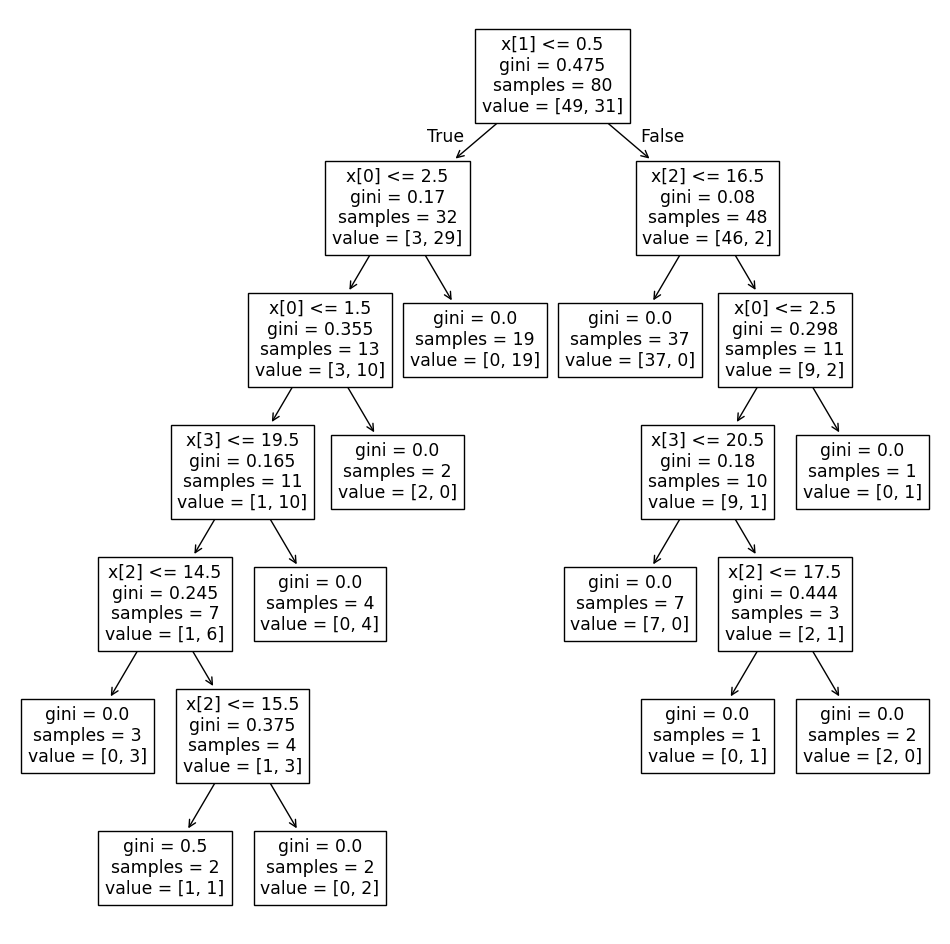

In [13]:
plt.figure(figsize=(12,12)) #To control the fig size, otherwise is very small
plot_tree(classifier_tree)

## Calculate the Performance Metric

In [15]:
y_predict = classifier_tree.predict(X_test)
acc = 100*np.mean((y_predict==y_test))

print(f"accuracy is {acc:2.2f} %")

accuracy is 100.00 %


In [ ]:
cm =

disp = 